In [ ]:
!pip install torchsummary

In [ ]:
# Import modules for file handling
import os

# Import modules for numerical computations
import numpy as np

# Import modules for working with data structures
import pandas as pd

# Import PyTorch library for deep learning
import torch

# Import modules for visualizations using tensors
import matplotlib.pyplot as plt

# Import modules for neural network components
import torch.nn as nn

# Import DataLoader for data loading and batching
from torch.utils.data import DataLoader

# Import PIL library for image processing
from PIL import Image

# Import functional interface for neural network operations
import torch.nn.functional as F

# Import modules for image transformations
import torchvision.transforms as transforms

# Import utility function for creating image grids
from torchvision.utils import make_grid

# Import dataset class for working with image folders
from torchvision.datasets import ImageFolder

# Import function for summarizing model architecture
from torchsummary import summary

# Enable inline plotting for visualizations
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_dir = "/content/drive/MyDrive/BIOE Dataset/train"
test_data_dir = "/content/drive/MyDrive/BIOE Dataset/test"

In [ ]:
plant_diseases = os.listdir(train_data_dir)  # Obtain the list of folders containing various plant disease images from the training directory

In [ ]:
print("Serial\tDisease")
print("----------------")
for i, disease in enumerate(plant_diseases, start=1):
    print(f"{i}\t{disease}")


Serial	Disease
----------------
1	Apple___Apple_scab
2	Apple___Black_rot
3	Apple___Cedar_apple_rust
4	Apple___healthy
5	Blueberry___healthy
6	Cherry_(including_sour)___Powdery_mildew
7	Cherry_(including_sour)___healthy
8	Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
9	Corn_(maize)___Common_rust_
10	Corn_(maize)___Northern_Leaf_Blight
11	Corn_(maize)___healthy
12	Grape___Black_rot
13	Grape___Esca_(Black_Measles)
14	Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
15	Grape___healthy
16	Orange___Haunglongbing_(Citrus_greening)
17	Peach___Bacterial_spot
18	Peach___healthy
19	Pepper,_bell___Bacterial_spot
20	Pepper,_bell___healthy
21	Potato___Early_blight
22	Potato___Late_blight
23	Potato___healthy
24	Raspberry___healthy
25	Soybean___healthy
26	Squash___Powdery_mildew
27	Strawberry___Leaf_scorch
28	Strawberry___healthy
29	Tomato___Bacterial_spot
30	Tomato___Early_blight
31	Tomato___Late_blight
32	Tomato___Leaf_Mold
33	Tomato___Septoria_leaf_spot
34	Tomato___Spider_mites Two-spotted_spider_mi

Total no.of plant diseases labels are: 38


In [ ]:
# Initialize an empty list to store unique plant names
different_plants = []

# Initialize a counter for the number of diseases
NumberOfDiseases = 0

# Loop through each disease in the list
for disease in plant_diseases:
    # Extract the plant name by splitting the string at '___'
    plant_name = disease.split('___')[0]

    # Check if the plant name is not already in the list of unique plants
    if plant_name not in different_plants:
        # Add the unique plant name to the list
        different_plants.append(plant_name)

    # Check if the disease label is not 'healthy'
    if disease.split('___')[1] != 'healthy':
        # Increment the disease count
        NumberOfDiseases += 1



In [ ]:
print("Serial\tplant")
print("----------------")
for i, plant in enumerate(different_plants, start=1):
    print(f"{i}\t{plant}")

Serial	plant
----------------
1	Apple
2	Blueberry
3	Cherry_(including_sour)
4	Corn_(maize)
5	Grape
6	Orange
7	Peach
8	Pepper,_bell
9	Potato
10	Raspberry
11	Soybean
12	Squash
13	Strawberry
14	Tomato


**The Total no.of different plants used are 14**

In [ ]:
# Display the total number of diseases
print(f"Total number of diseases: {NumberOfDiseases}")


Total number of diseases: 26


In [ ]:
import pandas as pd

# Create a dictionary to store the number of images for each disease
image_counts = {}
for disease in plant_diseases:
    image_counts[disease] = len(os.listdir(train_data_dir + '/' + disease))

# Convert the image counts dictionary into a pandas DataFrame
image_per_label = pd.DataFrame(image_counts.values(), index=image_counts.keys(), columns=["Number of Images"])
image_per_label.index.name = "Plant Disease"

# Add a row for the sum of all images
image_per_label.loc['Total'] = image_per_label['Number of Images'].sum()

# Display the DataFrame as a nicely formatted table
print(image_per_label)


                                                    Number of Images
Plant Disease                                                       
Apple___Apple_scab                                               111
Apple___Black_rot                                                114
Apple___Cedar_apple_rust                                          39
Apple___healthy                                                  288
Blueberry___healthy                                              239
Cherry_(including_sour)___Powdery_mildew                         181
Cherry_(including_sour)___healthy                                132
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot                83
Corn_(maize)___Common_rust_                                      199
Corn_(maize)___Northern_Leaf_Blight                              132
Corn_(maize)___healthy                                           212
Grape___Black_rot                                                187
Grape___Esca_(Black_Measles)      

**So there are Total 8751 Images available for training the model**

In [ ]:
train_data = ImageFolder(train_data_dir, transform=transforms.ToTensor())
test_data = ImageFolder(test_data_dir, transform=transforms.ToTensor())

In [ ]:
image_sample, label_sample = train_data[0]


In [ ]:
len(train_data.classes)

38

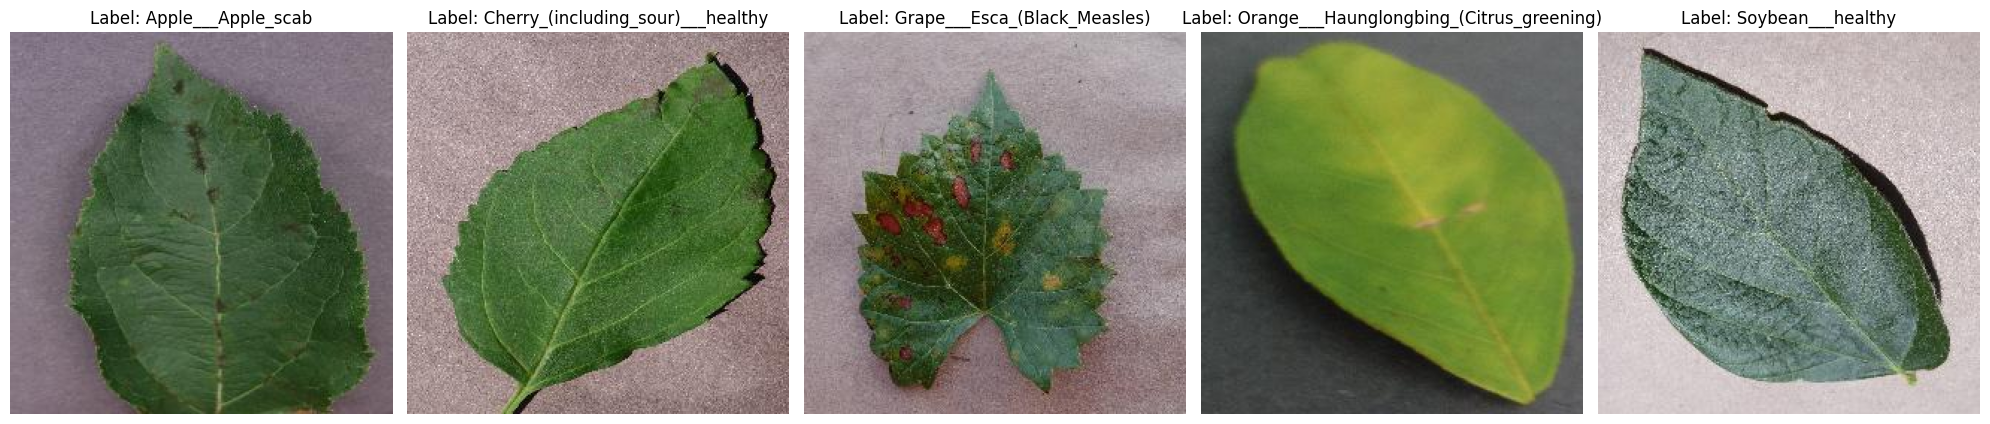

In [ ]:
# Display multiple images side by side in a table
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

images_and_labels = [
    (train_data[0][0], train_data.classes[train_data[0][1]]),
    (train_data[1000][0], train_data.classes[train_data[1000][1]]),
    (train_data[2000][0], train_data.classes[train_data[2000][1]]),
    (train_data[3000][0], train_data.classes[train_data[3000][1]]),
    (train_data[5000][0], train_data.classes[train_data[5000][1]])
]

for ax, (image, label) in zip(axes, images_and_labels):
    ax.imshow(image.permute(1, 2, 0))
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
random_seed = 11
torch.manual_seed(random_seed)


In [ ]:
batch_size = 32

In [ ]:
train_DL = DataLoader(train_data, batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_DL = DataLoader(test_data, batch_size, num_workers=2, pin_memory=True)

In [ ]:
def show_batch_images(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break


In [ ]:
show_batch_images(train_DL)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import torch

# Function to get the default device (GPU if available, else CPU)
def get_compute_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# Function to move tensor(s) to a chosen device
def move_to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [move_to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Custom class to load data onto a specific device (Compute Unit)
class DeviceDataLoader():
    def __init__(self, dataloader, compute_device):
        self.dataloader = dataloader
        self.compute_device = compute_device

    def __iter__(self):
        # Yield a batch of data after moving it to the specified device
        for batch in self.dataloader:
            yield move_to_device(batch, self.compute_device)

    def __len__(self):
        # Return the number of batches in the dataloader
        return len(self.dataloader)


In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

device = get_default_device()
device


device(type='cuda')

In [ ]:
train_DL = DeviceDataLoader(train_DL, device)
test_DL = DeviceDataLoader(test_DL, device)

In [ ]:
import torch.nn as nn

class CustomResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu_layer1 = nn.ReLU()
        self.conv_layer2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu_layer2 = nn.ReLU()

    def forward(self, x):
        output = self.conv_layer1(x)
        output = self.relu_layer1(output)
        output = self.conv_layer2(output)
        return self.relu_layer2(output) + x


In [ ]:
import torch.nn as nn

def calculate_accuracy(outputs, labels):
    _, predictions = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))

# Base class for image classification model
class CustomImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        predictions = self(images)                      # Generate predictions
        loss = F.cross_entropy(predictions, labels)     # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        predictions = self(images)                      # Generate predictions
        loss = F.cross_entropy(predictions, labels)     # Calculate loss
        accuracy = calculate_accuracy(predictions, labels)   # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": accuracy}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracies = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        epoch_accuracy = torch.stack(batch_accuracies).mean() # Combine accuracies
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))


In [ ]:
def create_conv_block(in_channels, out_channels, use_pooling=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if use_pooling:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

# ResNet-9 architecture
class CustomResNet9(CustomImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.conv1 = create_conv_block(in_channels, 64)
        self.conv2 = create_conv_block(64, 128, use_pooling=True)
        self.res1 = nn.Sequential(create_conv_block(128, 128), create_conv_block(128, 128))

        self.conv3 = create_conv_block(128, 256, use_pooling=True)
        self.conv4 = create_conv_block(256, 512, use_pooling=True)
        self.res2 = nn.Sequential(create_conv_block(512, 512), create_conv_block(512, 512))

        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Linear(512, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [ ]:
# Define the model and move it to the device
# Define the model
custom_model = CustomResNet9(3, len(train_data.classes))

# Move the model to the device
custom_model = custom_model.to(device)
custom_model



CustomResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpl

In [ ]:
INPUT_SHAPE = (3, 256, 256)
print(summary(custom_model.cuda(), input_size=INPUT_SHAPE))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

In [ ]:
@torch.no_grad()
def evaluate_model(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_learning_rate(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                  grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    evaluation_results = []
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Scheduler for one cycle learning rate
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        learning_rates = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Recording and updating learning rates
            learning_rates.append(get_learning_rate(optimizer))
            scheduler.step()

        # Validation
        result = evaluate_model(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['learning_rates'] = learning_rates
        model.epoch_end(epoch, result)
        evaluation_results.append(result)

    return evaluation_results


In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)





In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    evaluation_results = []

    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))


    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()


        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        evaluation_results.append(result)

    return evaluation_results

In [ ]:
custom_model = CustomResNet9(3, len(train_data.classes))
model = to_device(custom_model, device)

# Now you can use the evaluate function
evaluation_results = [evaluate(model, test_DL)]
evaluation_results

[{'val_loss': tensor(3.6442, device='cuda:0'), 'val_accuracy': tensor(0.0098)}]

In [ ]:
epochs = 10
max_learning_rate = 0.01
gradient_clip = 0.1
weight_decay_rate = 1e-4
optimizer_function = torch.optim.Adam


In [ ]:
evaluation_results += fit_OneCycle(epochs, max_learning_rate, model, train_DL, test_DL,
                                   grad_clip=gradient_clip,
                                   weight_decay=weight_decay_rate,
                                   opt_func=optimizer_function)


Epoch [0], last_lr: 0.00279, train_loss: 1.4377, val_loss: 2.4841, val_acc: 0.5159
Epoch [1], last_lr: 0.00759, train_loss: 1.2261, val_loss: 4.5093, val_acc: 0.3483
Epoch [2], last_lr: 0.01000, train_loss: 0.7781, val_loss: 0.6137, val_acc: 0.8068
Epoch [3], last_lr: 0.00950, train_loss: 0.4319, val_loss: 0.7555, val_acc: 0.7747
Epoch [4], last_lr: 0.00812, train_loss: 0.2876, val_loss: 0.3908, val_acc: 0.8860
Epoch [5], last_lr: 0.00611, train_loss: 0.1907, val_loss: 0.6072, val_acc: 0.8249
Epoch [6], last_lr: 0.00389, train_loss: 0.1326, val_loss: 0.2307, val_acc: 0.9252
Epoch [7], last_lr: 0.00188, train_loss: 0.0472, val_loss: 0.1078, val_acc: 0.9638
Epoch [8], last_lr: 0.00050, train_loss: 0.0115, val_loss: 0.0642, val_acc: 0.9788
Epoch [9], last_lr: 0.00000, train_loss: 0.0057, val_loss: 0.0614, val_acc: 0.9797


**We have achieved an Accuracy for 98%**

In [ ]:
def plot_accuracies(evaluation_results):
    accuracies = [x['val_accuracy'] for x in evaluation_results]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');





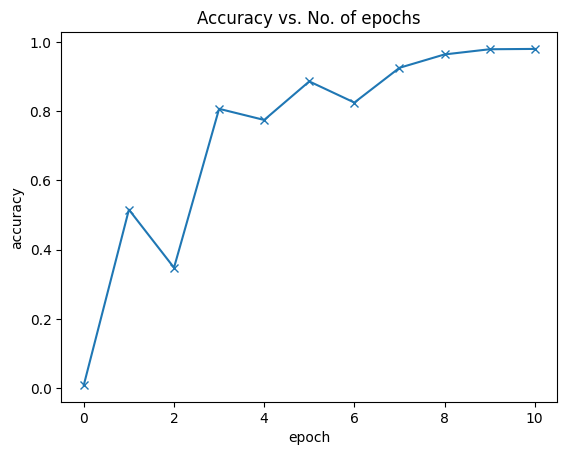

In [ ]:
plot_accuracies(evaluation_results)

In [ ]:
def plot_lrs(evaluation_results):
    lrs = np.concatenate([x.get('lrs', []) for x in evaluation_results])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');


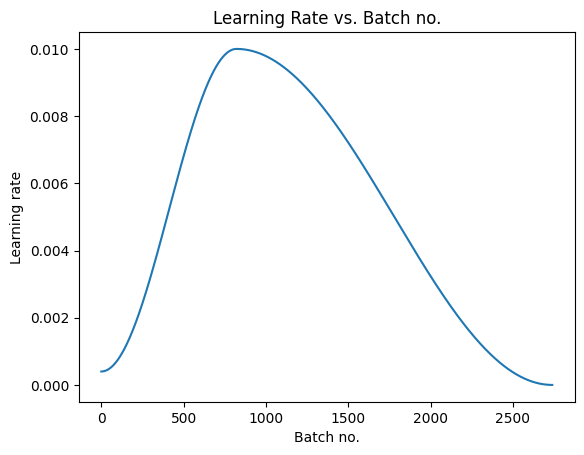

In [ ]:
plot_lrs(evaluation_results)